# **Actividad 1 – Machine Learning II**: Predicción temprana de progresión a riesgo cardiovascular para priorización preventiva en APS rural.

Claudio Cárdenas Mansilla$^{1}$ \\
Evelyn Sánchez Cabezas$^{2}$ \\

$^{1}$ Subdepartamento de Inteligencia Sanitaria, Dirección de Servicio de Salud Chiloé \\
$^{2}$ Coordinación de Centros de Atención a la Comunidad, Facultad de Salud y Ciencias Sociales, Universidad de Las Américas \\

## Resumen Ejecutivo

Este estudio aborda el desafío crítico de la **predicción temprana de la progresión a riesgo cardiovascular (PSCV)** en la Atención Primaria de Salud (APS) rural de la comuna de Quellón, Chile. El objetivo principal fue desarrollar un modelo predictivo robusto que identifique a usuarios que, aunque actualmente no cumplen los umbrales de PSCV, tienen una alta probabilidad de progresar a esta condición, permitiendo así una priorización preventiva.

**Metodología:**
Se integraron dos fuentes de datos rutinarios de la APS (Control Cardiovascular y Examen de Medicina Preventiva - EMPA) para consolidar un conjunto de 3.058 registros. La matriz analítica resultante incluyó nueve variables clínicas y demográficas (edad, sexo, peso, talla, circunferencia de cintura, PAS, PAD y CT). El preprocesamiento de datos involucró el tratamiento de valores atípicos mediante el método del rango intercuartílico (IQR), estandarización de variables numéricas y codificación One-Hot para variables categóricas, todo ello integrado en un pipeline de `scikit-learn`. Se evaluaron varios modelos de Regresión Logística (base, con polinomios, y versiones L1/L2 optimizadas) mediante validación cruzada estratificada de 5 folds. Las métricas clave de evaluación fueron AUC-ROC y PR-AUC, con un enfoque particular en la clase positiva (PCV=1). La optimización de hiperparámetros se realizó con `GridSearchCV`, y se empleó un Análisis de Varianza (ANOVA) para comparar estadísticamente el rendimiento de los modelos.


## Objetivo del estudio.

El objetivo de este estudio fue desarrollar un modelo predictivo de progresión hacia criterios PSCV en usuarios que actualmente no cumplen los umbrales establecidos, utilizando registros rutinarios de la comuna de Quellón. Se integraron bases del Control Cardiovascular y del Examen de Medicina Preventiva (EMPA), obteniendo un conjunto de 3.058 usuarios con variables clínicas básicas.


## Justificación de abordaje del  problema mediante *algoritmos de Machine Learning*.


Desde un punto de vista computacional, el problema de predecir la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) en usuarios que aún no cumplen los umbrales clínicos establecidos constituye un desafío relevante y no abordable de forma eficiente mediante enfoques tradicionales de programación basada en reglas. Las principales razones son las siguientes:

- ***Relaciones no lineales y multifactoriales*** :
La progresión al PSCV no responde a reglas lineales simples del tipo “si-entonces”. Variables como edad, presión arterial, circunferencia de cintura y colesterol interactúan entre sí de manera compleja y no lineal. Por ejemplo, un mismo nivel de presión arterial puede tener implicancias de riesgo distintas según la edad o el perfil antropométrico del usuario. Este tipo de interacciones es difícil de codificar explícitamente mediante lógica determinista tradicional.


Fuente: https://openaccess.uoc.edu/server/api/core/bitstreams/a5dca908-d32d-4e4c-a677-b143eba20d0d/content


- ***Ruido, variabilidad biológica y heterogeneidad poblacional*** :
Los datos provienen de registros rutinarios de APS, con variabilidad inherente a la medición clínica, diferencias entre profesionales, condiciones de toma de exámenes y heterogeneidad epidemiológica de la población. Esta variabilidad introduce ruido que dificulta establecer umbrales fijos o reglas universales estables, como exigiría un enfoque programático clásico.

Fuente: https://www.researchgate.net/publication/393849207_Overcoming_Data_Quality_Challenges_in_Healthcare_Predictive_Models

- ***Incertidumbre y naturaleza probabilística del fenómeno*** :
La progresión hacia criterios PSCV no es un evento determinístico, sino probabilístico. Dos personas con perfiles clínicos similares pueden evolucionar de manera distinta en el tiempo. Los enfoques tradicionales no manejan adecuadamente esta incertidumbre, mientras que los modelos predictivos permiten estimar probabilidades continuas y niveles de riesgo.

Fuente: https://arxiv.org/abs/2008.10114

- ***Sesgo-Varianza y riesgo de sobreajuste con métodos simples***: En el aprendizaje estadístico existe el llamado dilema sesgo-varianza, donde modelos demasiado simples (alta bias) no capturan patrones relevantes, y modelos muy complejos se ajustan a ruido en los datos (overfitting). Los enfoques tradicionales de programación no cuentan con mecanismos sistemáticos para balancear este dilema, mientras que los modelos predictivos supervisados (p. ej., árboles de decisión, XGBoost) incluyen regularización y validación cruzada para evitar sobreajuste y mejorar generalización.

Fuente: https://es.wikipedia.org/wiki/Dilema_sesgo-varianza


- ***Necesidad de generalización y adaptación poblacional***: Los modelos clínicos deben generalizar a diferentes contextos poblacionales (edad, género, características epidemiológicas locales). Los enfoques tradicionales como reglas condicionales escritas a mano pierden eficacia cuando se aplican fuera del contexto original de diseño, mientras que los sistemas de aprendizaje automático pueden aprender patrones implícitos adaptados a características específicas de la población estudiada, como la comuna de Quellón..

Fuente: https://www.nature.com/articles/s41598-025-26855-8


A modo de conclusión, el desafío computacional radica en que la progresión al PSCV es un fenómeno complejo, no lineal, ruidoso y probabilístico, que emerge de la interacción de múltiples variables clínicas. Estas características hacen inviable su resolución mediante programación basada en reglas fijas y justifican el uso de modelos predictivos supervisados, capaces de aprender patrones latentes desde los datos y adaptarse a la realidad operativa de la Atención Primaria de Salud.

## Materiales y Métodos.

### Fuentes de datos.
Se utilizaron dos fuentes de información provenientes de la Atención Primaria de Salud (APS) de la comuna de Quellón. La primera corresponde a la base de datos de la población en control cardiovascular, con corte a junio de 2017, la cual incluye un total de 1.478 registros clínicos. La segunda fuente corresponde a la base de datos del Examen de Medicina Preventiva (EMP), correspondiente al año 2016 y al primer semestre de 2017, extraída desde el sistema RAYEN y proporcionada por el Subdepartamento de Tecnologías de la Información del Servicio de Salud Chiloé, con un total de 1.580 registros.

El proceso de integración y depuración de ambas fuentes permitió consolidar un total de 3.058 registros válidos para el análisis. Posteriormente, y de acuerdo con las etapas de comprensión y preparación de los datos definidas en la metodología CRISP-DM, se construyó una matriz analítica depurada, compuesta por nueve variables predictoras de carácter clínico y demográfico: edad, circunferencia de cintura (CC), presión arterial sistólica (PAS), presión arterial diastólica (PAD), colesterol total, peso, talla y sexo.

Los datos utilizados en el presente estudio corresponden a una submuestra de los registros empleados en el estudio previamente publicado por Cárdenas et al. (2018), el cual consideró un total de 3.586 registros: Diseño de un modelo predictivo de pesquisa cardiovascular utilizando Árboles de Decisión: propensión de pacientes a presentar diabetes tipo 2, hipertensión arterial o dislipidemia: estudio piloto, comuna de Quellón, Chiloé (Revista Chilena de Cardiología, 37(2), 126–133; https://dx.doi.org/10.4067/S0718-85602018000200126
). En este trabajo, los datos son reutilizados como análisis secundario, con el objetivo de aplicar nuevos algoritmos de aprendizaje automático, junto con estrategias de validación y testeo más robustas, acordes a los avances metodológicos y tecnológicos actuales, con el fin de fortalecer la capacidad predictiva y la solidez de los resultados obtenidos.


### Consideraciones éticas

El estudio se desarrolló a partir de datos secundarios provenientes de registros clínicos rutinarios de la Atención Primaria de Salud, debidamente anonimizados y sin información que permita la identificación directa o indirecta de las personas. El uso de la información se enmarca en fines de investigación en salud pública y mejora de la gestión sanitaria, respetando los principios éticos de confidencialidad, minimización de datos y uso responsable de la información, de acuerdo con la normativa vigente y las buenas prácticas en investigación epidemiológica.

Asimismo, la reutilización de los datos se realizó con plena transparencia, declarando explícitamente su uso previo en una publicación científica y estableciendo que el presente trabajo corresponde a un análisis secundario con objetivos y enfoques metodológicos distintos, lo cual es consistente con las recomendaciones del Comité Internacional de Editores de Revistas Médicas (ICMJE) y del Committee on Publication Ethics (COPE).

Fuente: https://www.icmje.org/recommendations/browse/publishing-and-editorial-issues/overlapping-publications.html


### Variable Objetivo

Esta variable se definió con la denominación “PCV”, compuesta por dos grupos: GRUPO 1 = Grupo de pacientes en control del Programa Cardiovascular, que presenta al menos una de las tres patologías (DM, HTA o DLP). GRUPO 0 = Grupo de Pacientes EMPA (2016 a junio 2017) y que no están en control en Programa Cardiovascular, al corte de junio del 2017 y, eventualmente, no presenta ninguna de las tres patologías señaladas. Luego, este grupo servirá para poder discriminar y encontrar aquellos patrones en los datos que caracterizan a las personas con algunas de las tres patologías del grupo “1” y las diferencian de aquellos en el grupo “0”.


In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)

## Dataset y descripción de variables

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/TALLER_MET.INVESTIGACION_DATA_SCIENCE/TMIDS_TRABAJO_1/CLASE_5/data_model_pvc_quellon_2024_fin.xlsx')
df.columns

Index(['PCV', 'SEXO', 'EDAD', 'PESO', 'TALLA', 'CC', 'PAS', 'PAD', 'CT'], dtype='object')

### Diccionario de Caracteristicas:

- PCV: Variable Objetivo progresión hacia criterios PSCV (Programa de Salud Cardiovascular), cumplimiento (0 = No Cumple; 1 = Si Cumple)
- SEXO: Sexo del Usuario (0 = Hombre; 1 = Mujer)
- EDAD: Edad del usuario en años.
- PESO: Peso del Usuario en Kilogramos.
- TALLA: Talla (estatura) en centimetros.
- CC: Cirscunferencia de Cintura en metros.
- PAS: Presión arterial sistolica (Normal: Presión sistólica menor de \(120\) mmHg.)
- PAD: Presión arterial diastolica (Normal: Presión diastólica menor de \(80\) mmHg.)
- CT: Colesterol Total (Los valores normales de colesterol total para adultos son menos de 200 mg/dL (miligramos por decilitro))

##Exploración y preprocesamiento de datos

### Exploración inicial del dataset.

In [ ]:
df.head()

,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT
0,1,0,56,110.2,168,119.0,126,80,275.0
1,1,1,81,70.0,144,97.0,130,60,171.0
2,1,1,60,92.4,155,110.0,180,86,216.0
3,1,1,84,70.2,152,113.0,116,70,198.0
4,1,0,76,77.1,150,107.0,180,80,223.0


### Tamaño del dataset y variable Objetivo "PCV".

Tamaño del dataset: (3058, 9)
PCV
0    0.516678
1    0.483322
Name: proporción, dtype: float64


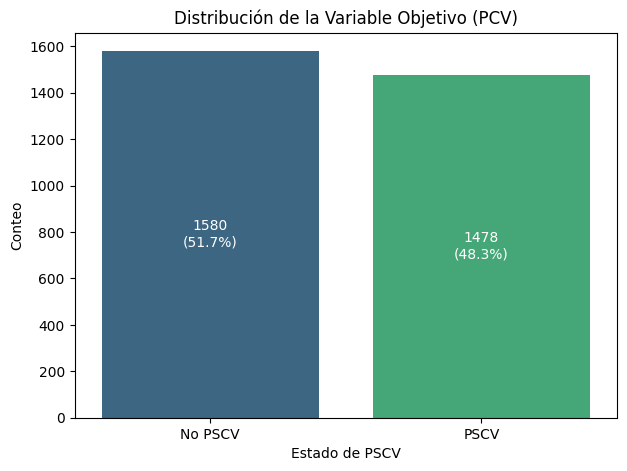

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Tamaño del dataset:", df.shape)

print(df["PCV"].value_counts(normalize=True).rename("proporción"))

# Crear el gráfico de barras para 'PCV'
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='PCV', data=df, palette='viridis')
plt.title('Distribución de la Variable Objetivo (PCV)')
plt.xlabel('Estado de PSCV')
plt.ylabel('Conteo')

# Ajustar las etiquetas del eje X
ax.set_xticks([0, 1])
ax.set_xticklabels(['No PSCV', 'PSCV'])

# Calcular conteos y proporciones
total = len(df['PCV'])
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.text(p.get_x() + p.get_width() / 2.,
            height / 2, # Position label inside the bar (half height)
            f'{int(height)}\n({percentage})',
            ha='center', va='center', fontsize=10, color='white') # Center vertically and use white color

plt.show()

### Definición de variables cuantitativas, categóricas y variable Objetivo.

In [ ]:
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]

categorical_features = [
    "SEXO",
]

X = df[numeric_features + categorical_features]
y = df["PCV"]

### Descripción de variable explicativas en función de variable objetivo.

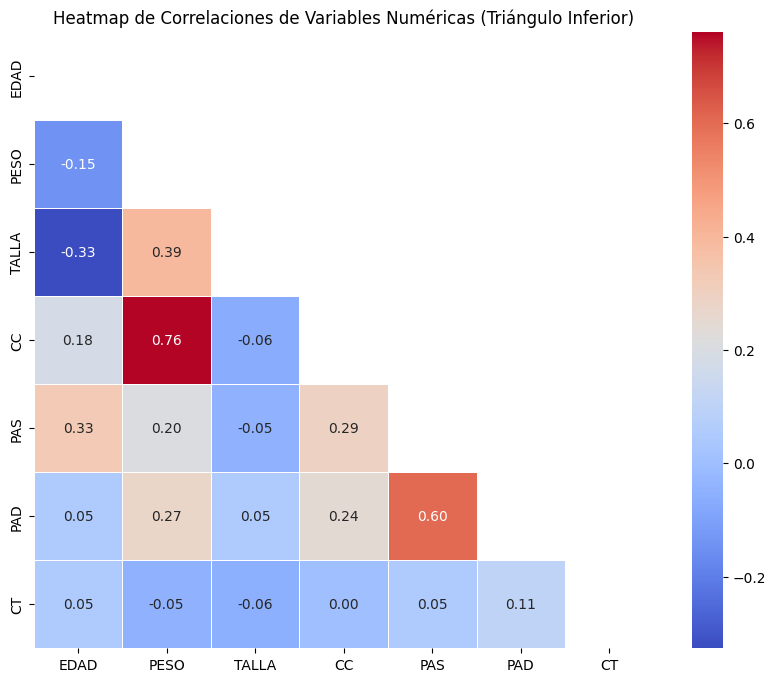

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df[numeric_features].corr()

# Crear una máscara para la parte superior del triángulo
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el Heatmap de Correlaciones con la máscara aplicada
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Heatmap de Correlaciones de Variables Numéricas (Triángulo Inferior)')
plt.show()

### Identificación de valores faltantes.




In [ ]:
missing_data = []

for col in df.columns:
    # Conteo de valores nulos
    null_count = df[col].isnull().sum()

    # Conteo de valores en blanco (solo para tipos de datos de cadena)
    blank_count = 0
    if df[col].dtype == 'object' or pd.api.types.is_string_dtype(df[col]):
        blank_count = (df[col] == '').sum()

    total_missing = null_count + blank_count
    total_rows = len(df)
    percentage_missing = (total_missing / total_rows) * 100

    missing_data.append({
        'Variable': col,
        'Nulos': null_count,
        'Blancos': blank_count,
        'Total Faltantes': total_missing,
        '% Faltantes': f'{percentage_missing:.2f}%'
    })

missing_df = pd.DataFrame(missing_data)
print(missing_df)

  Variable  Nulos  Blancos  Total Faltantes % Faltantes
0      PCV      0        0                0       0.00%
1     SEXO      0        0                0       0.00%
2     EDAD      0        0                0       0.00%
3     PESO      0        0                0       0.00%
4    TALLA      0        0                0       0.00%
5       CC      0        0                0       0.00%
6      PAS      0        0                0       0.00%
7      PAD      0        0                0       0.00%
8       CT      0        0                0       0.00%


### Distribución de variable categórica (sexo).

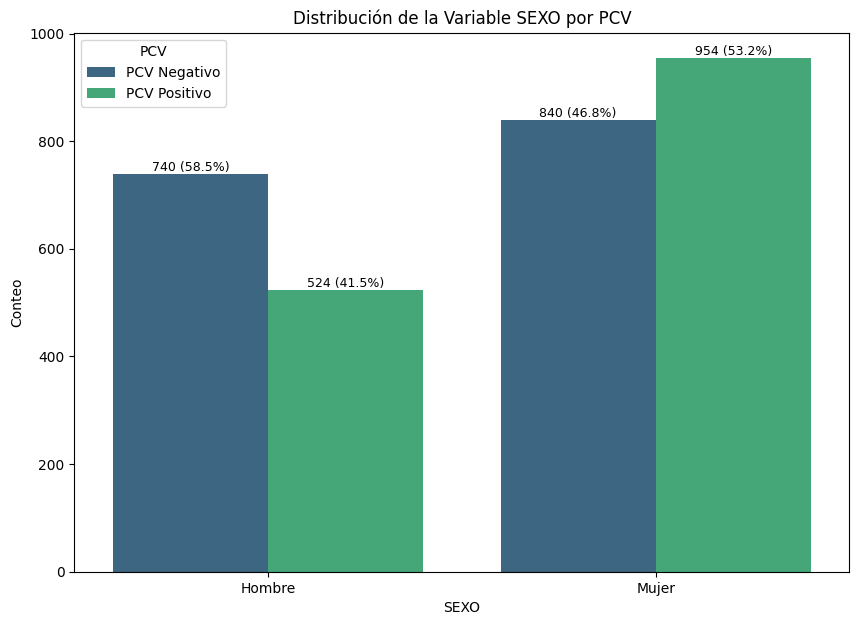

Conteo de SEXO:
SEXO_LABEL
Hombre    1264
Mujer     1794
Name: count, dtype: int64

Proporción de SEXO:
SEXO_LABEL
Hombre    0.413342
Mujer     0.586658
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapear los valores numéricos a etiquetas descriptivas para SEXO
df['SEXO_LABEL'] = df['SEXO'].map({0: 'Hombre', 1: 'Mujer'})

# Mapear los valores numéricos a etiquetas descriptivas para PCV
df['PCV_LABEL'] = df['PCV'].map({0: 'PCV Negativo', 1: 'PCV Positivo'})

# Definir el orden deseado para las categorías en el gráfico
category_order_sexo = ['Hombre', 'Mujer']
category_order_pcv = ['PCV Negativo', 'PCV Positivo']

# Crear el gráfico de barras, especificando el orden y usando hue para PCV
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='SEXO_LABEL', data=df, palette='viridis', order=category_order_sexo, hue='PCV_LABEL', hue_order=category_order_pcv)
plt.title('Distribución de la Variable SEXO por PCV')
plt.xlabel('SEXO')
plt.ylabel('Conteo')
plt.legend(title='PCV')

# Calcular conteos y proporciones para las etiquetas
# Usamos pd.crosstab para obtener los conteos de forma sencilla
counts_table = pd.crosstab(df['SEXO_LABEL'], df['PCV_LABEL'])
# Y para las proporciones dentro de cada grupo SEXO
proportions_table = pd.crosstab(df['SEXO_LABEL'], df['PCV_LABEL'], normalize='index')

# Añadir conteo y proporción a cada barra
for i, container in enumerate(ax.containers):
    pcv_label = category_order_pcv[i] # Obtener la etiqueta PCV para este contenedor

    for bar_idx, bar in enumerate(container):
        sexo_label = category_order_sexo[bar_idx] # Obtener la etiqueta SEXO para esta barra

        count = counts_table.loc[sexo_label, pcv_label]
        proportion = proportions_table.loc[sexo_label, pcv_label]

        # Colocar la etiqueta de texto (conteo y proporción)
        ax.text(
            bar.get_x() + bar.get_width() / 2, # Posición X: centro de la barra
            bar.get_height(),                  # Posición Y: en la parte superior de la barra
            f'{count} ({proportion:.1%})',     # Texto: conteo (proporción)
            ha='center', va='bottom', fontsize=9, color='black'
        )

plt.show()

# Todavía podemos imprimir las tablas de conteo y proporción general de SEXO
print("Conteo de SEXO:")
print(df['SEXO_LABEL'].value_counts().reindex(category_order_sexo))
print("\nProporción de SEXO:")
print(df['SEXO_LABEL'].value_counts(normalize=True).reindex(category_order_sexo))


### Análisis descriptivo de variables cuantitativas.

In [ ]:
print('Descripción de Variables Cuantitativas:')
display(X[numeric_features].describe())

Descripción de Variables Cuantitativas:


,EDAD,PESO,TALLA,CC,PAS,PAD,CT
count,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000,3058.000000
mean,50.683453,76.633869,157.997057,100.423708,121.773054,74.954545,200.190320
std,15.133076,13.482398,8.728728,11.166665,16.367233,9.872042,35.354991
min,19.000000,40.000000,135.000000,65.000000,80.000000,48.000000,130.000000
25%,39.000000,67.000000,151.000000,93.000000,110.000000,70.000000,174.000000
50%,50.000000,75.000000,157.000000,100.000000,120.000000,78.000000,196.000000
75%,60.000000,85.000000,164.000000,107.000000,130.000000,80.000000,222.000000
max,94.000000,125.000000,192.000000,140.000000,190.000000,110.000000,343.000000


### Distribución de variables cuantitativas del dataset.

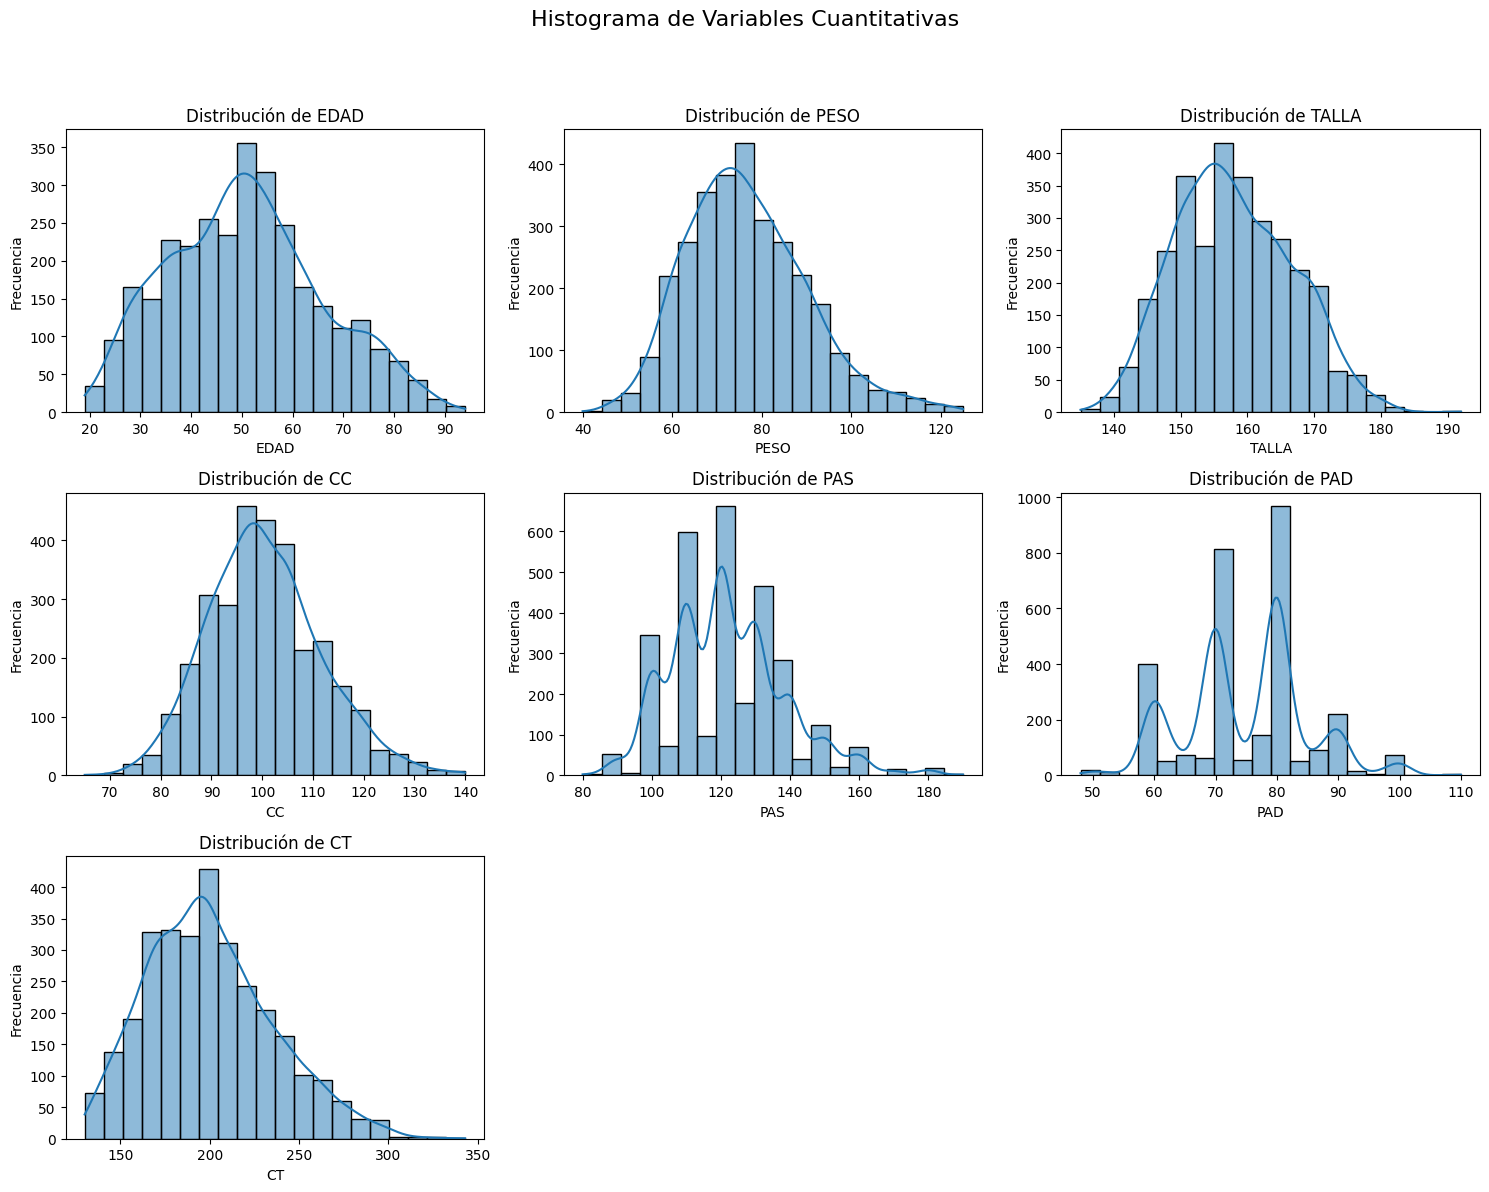

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determina el número de filas y columnas para la matriz de gráficos
num_features = len(numeric_features)
num_cols = 3  # Puedes ajustar el número de columnas deseado
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Histograma de Variables Cuantitativas', y=1.02, fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[feature], kde=True, bins=20) # Removed palette argument as it was ignored without a 'hue' variable
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el layout para evitar solapamientos
plt.show()

## Análisis de datos Atípicos (Outliers).

Dado que las variables clínicas cuantitativas pueden presentar valores extremos que distorsionen la estimación de parámetros y la estabilidad de los modelos, se aplicó un procedimiento sistemático de tratamiento de datos atípicos basado en el método del rango intercuartílico (IQR). Para cada variable numérica (edad, peso, talla, CC, PAS, PAD y CT) se calcularon los percentiles 25 (Q1) y 75 (Q3), obteniendo el IQR (Q3–Q1). Los valores inferiores a Q1 − 1,5·IQR fueron reemplazados por el límite inferior y los superiores a Q3 + 1,5·IQR fueron reemplazados por el límite superior. Se generó así una versión del dataset sin outliers (df_no_outliers), conservando en paralelo una copia del dataset original para referencia. A partir de esta versión depurada se definieron las matrices de entrada (X) y de salida (y) del modelo.

### Identificación de datos atípicos

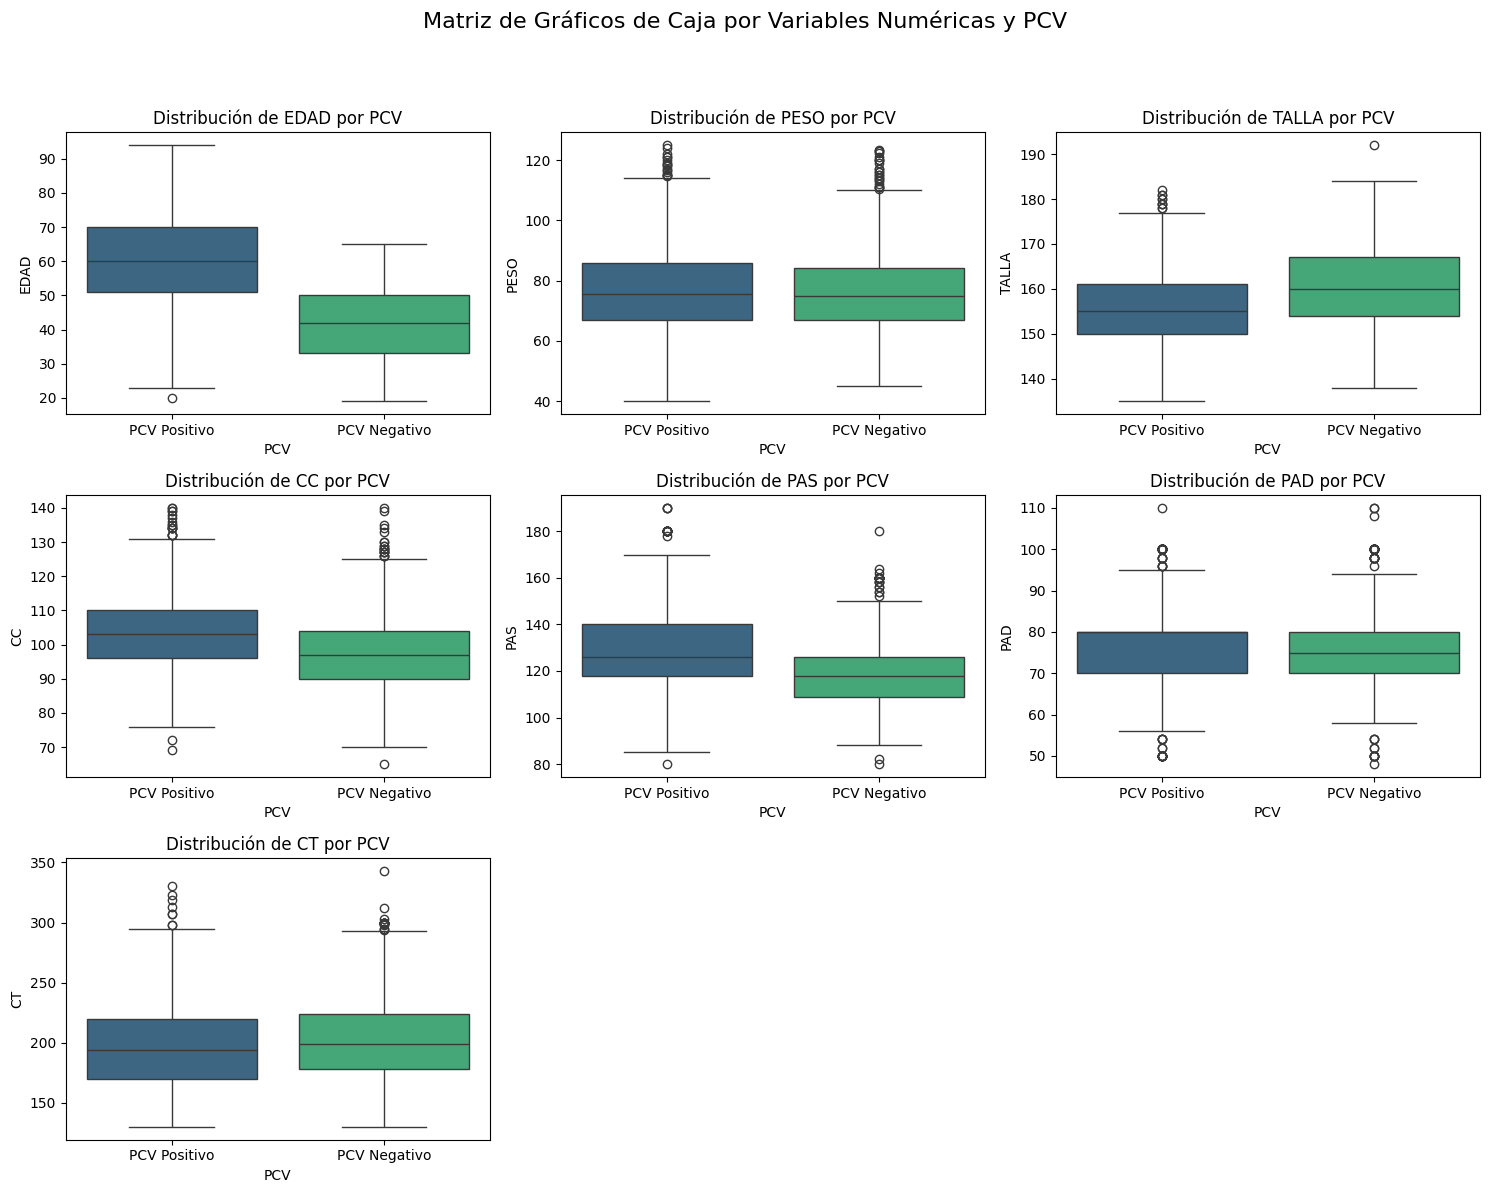

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define las variables numéricas y la variable de agrupamiento
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]
pcv_variable_label = 'PCV_LABEL'

# Determina el número de filas y columnas para la matriz de gráficos
num_features = len(numeric_features)
num_cols = 3  # Puedes ajustar el número de columnas
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Matriz de Gráficos de Caja por Variables Numéricas y PCV', y=1.02, fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=pcv_variable_label, y=feature, data=df, palette='viridis')
    plt.title(f'Distribución de {feature} por PCV')
    plt.xlabel('PCV')
    plt.ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta el layout para evitar solapamientos
plt.show()


### Tratamiento de datos atípicos.



In [ ]:
def handle_outliers_iqr(df_input, columns, iqr_multiplier=1.5):
    """
    Identifica y reemplaza outliers en un DataFrame usando el método IQR.
    Los outliers son reemplazados por el límite inferior o superior del IQR.

    Args:
        df_input (pd.DataFrame): El DataFrame de entrada.
        columns (list): Lista de nombres de columnas donde buscar outliers.
        iqr_multiplier (float): Multiplicador para el IQR (por defecto 1.5).

    Returns:
        pd.DataFrame: Un nuevo DataFrame con los outliers reemplazados.
    """
    df_processed = df_input.copy() # Crear una copia para no modificar el dataset original
    original_df_saved = df_input.copy() # Guardar el dataset inicial sin modificaciones

    for col in columns:
        if col in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed[col]):
            Q1 = df_processed[col].quantile(0.25)
            Q3 = df_processed[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

            # Reemplazar outliers: valores menores que el límite inferior por el límite inferior
            df_processed.loc[df_processed[col] < lower_bound, col] = lower_bound
            # Reemplazar outliers: valores mayores que el límite superior por el límite superior
            df_processed.loc[df_processed[col] > upper_bound, col] = upper_bound
        else:
            print(f"Advertencia: La columna '{col}' no es numérica o no existe y será ignorada.")

    print("El dataset original se ha guardado en la variable 'original_df_saved'.")
    return df_processed, original_df_saved

# Ejemplo de uso:
# Asumiendo que 'df' es tu DataFrame actual y 'numeric_features' tu lista de columnas numéricas
df_no_outliers, original_df_saved = handle_outliers_iqr(df, numeric_features)
print("\nDataFrame sin outliers (primeras 5 filas):")
display(df_no_outliers.head())
print("\nDataFrame original (primeras 5 filas, sin modificar):")
display(original_df_saved.head())

El dataset original se ha guardado en la variable 'original_df_saved'.

DataFrame sin outliers (primeras 5 filas):


,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO_LABEL,PCV_LABEL
0,1,0,56.0,110.2,168.0,119.0,126,80,275.0,Hombre,PCV Positivo
1,1,1,81.0,70.0,144.0,97.0,130,60,171.0,Mujer,PCV Positivo
2,1,1,60.0,92.4,155.0,110.0,160,86,216.0,Mujer,PCV Positivo
3,1,1,84.0,70.2,152.0,113.0,116,70,198.0,Mujer,PCV Positivo
4,1,0,76.0,77.1,150.0,107.0,160,80,223.0,Hombre,PCV Positivo



DataFrame original (primeras 5 filas, sin modificar):


,PCV,SEXO,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO_LABEL,PCV_LABEL
0,1,0,56,110.2,168,119.0,126,80,275.0,Hombre,PCV Positivo
1,1,1,81,70.0,144,97.0,130,60,171.0,Mujer,PCV Positivo
2,1,1,60,92.4,155,110.0,180,86,216.0,Mujer,PCV Positivo
3,1,1,84,70.2,152,113.0,116,70,198.0,Mujer,PCV Positivo
4,1,0,76,77.1,150,107.0,180,80,223.0,Hombre,PCV Positivo


## Definición de Variables Predictoras (X) y Variable Objetivo (y)

El siguiente bloque de código tiene como propósito fundamental preparar los conjuntos de datos que serán utilizados para el entrenamiento y evaluación de los modelos de Machine Learning. Se establecen claramente las **variables predictoras (o características)**, denotadas convencionalmente como `X`, y la **variable objetivo (o etiqueta)**, denotada como `y`.

```python
X = df_no_outliers[numeric_features + categorical_features]
y = df_no_outliers["PCV"]
```

### Desglose del Código:

1.  **Definición de las Variables Predictoras (`X`):**
    *   `df_no_outliers`: Este es el DataFrame resultante de la etapa de preprocesamiento donde se realizó el tratamiento de datos atípicos (outliers) utilizando el método del rango intercuartílico (IQR). Es crucial usar este DataFrame 'limpio' para evitar que los valores extremos distorsionen el aprendizaje del modelo.
    *   `numeric_features`: Es una lista que contiene los nombres de todas las columnas identificadas como variables numéricas en el dataset (ej., "EDAD", "PESO", "TALLA", "CC", "PAS", "PAD", "CT").
    *   `categorical_features`: Es una lista que contiene los nombres de todas las columnas identificadas como variables categóricas (ej., "SEXO").
    *   `numeric_features + categorical_features`: Al concatenar estas dos listas, se crea una lista única que incluye todos los nombres de las columnas que se desean utilizar como características de entrada para el modelo.
    *   `df_no_outliers[...]`: Se utiliza esta sintaxis de indexación de Pandas para seleccionar únicamente las columnas especificadas en la lista combinada del DataFrame `df_no_outliers`. El resultado es un nuevo DataFrame, `X`, que contendrá todas las características relevantes sin la variable objetivo.

2.  **Definición de la Variable Objetivo (`y`):**
    *   `df_no_outliers["PCV"]`: Aquí se selecciona una única columna del DataFrame `df_no_outliers`, la columna denominada "PCV". Esta columna representa la variable que el modelo intentará predecir: la progresión hacia criterios del Programa de Salud Cardiovascular (0 = No Cumple; 1 = Si Cumple).
    *   El resultado es una Serie de Pandas, `y`, que contiene los valores de la variable objetivo correspondientes a cada registro en `X`.

### Propósito e Importancia:

Este paso es fundamental porque separa explícitamente los inputs (las características) de los outputs (la variable a predecir) del modelo de Machine Learning. Esta clara distinción es un requisito para la mayoría de los algoritmos de aprendizaje supervisado, que aprenden a mapear los patrones de `X` a los valores de `y`.

In [ ]:
# Definir X y Y usando el DataFrame sin outliers
X = df_no_outliers[numeric_features + categorical_features]
y = df_no_outliers["PCV"]

## Preprocesamiento de Variables (Pipeline de Escalado y Codificación)

El preprocesamiento de variables es un paso fundamental para preparar los datos antes de entrenar los modelos, asegurando que estén en un formato adecuado y que no introduzcan sesgos o problemas numéricos. En este trabajo, el preprocesamiento se realizó mediante un **pipeline** robusto de `scikit-learn`, que combina diferentes transformaciones para variables numéricas y categóricas. La estructura principal utiliza un `ColumnTransformer` para aplicar estas transformaciones de manera selectiva a las columnas correspondientes.

### 1. Definición de Variables Numéricas y Categóricas

Primero, se identifican explícitamente las listas de variables numéricas y categóricas:

*   **`numeric_features`**: `["EDAD", "PESO", "TALLA", "CC", "PAS", "PAD", "CT"]`
*   **`categorical_features`**: `["SEXO"]`

### 2. Transformadores Individuales

Se definen transformadores específicos para cada tipo de variable:

*   **Transformador Numérico (`numeric_transformer_base`):**
    *   Utiliza un `Pipeline` con un solo paso: `("scaler", StandardScaler())`.
    *   `StandardScaler` estandariza las características numéricas escalándolas para que tengan una media de 0 y una desviación estándar de 1. Esto es crucial para muchos algoritmos de Machine Learning (como la Regresión Logística), ya que evita que las características con rangos de valores más grandes dominen el proceso de aprendizaje.

*   **Transformador Categórico (`categorical_transformer`):**
    *   Utiliza un `Pipeline` con un solo paso: `("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False))`.
    *   `OneHotEncoder` convierte las variables categóricas en un formato numérico que puede ser utilizado por los modelos. Cada categoría se transforma en una nueva columna binaria (0 o 1).
    *   `handle_unknown="ignore"`: Permite que el codificador maneje categorías desconocidas en el futuro sin lanzar un error, asignando todos ceros.
    *   `drop="if_binary"`: Si una característica categórica tiene solo dos categorías (como 'SEXO' en este caso), `OneHotEncoder` creará una sola columna (por ejemplo, para 'Mujer'), siendo el valor 0 para 'Hombre' y 1 para 'Mujer'. Esto evita la multicolinealidad perfecta.
    *   `sparse_output=False`: Asegura que la salida del codificador sea una matriz densa de `numpy` en lugar de una matriz dispersa.

### 3. Combinación de Transformadores con `ColumnTransformer`

El `ColumnTransformer` (`preprocessor_base`) es la herramienta que permite aplicar diferentes transformaciones a diferentes columnas del DataFrame. Se configura de la siguiente manera:

```python
preprocessor_base = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
```

*   Toma una lista de tuplas, donde cada tupla especifica:
    *   Un nombre para el transformador (ej. "num", "cat").
    *   El objeto transformador (ej. `numeric_transformer_base`, `categorical_transformer`).
    *   La lista de columnas a las que se debe aplicar ese transformador (ej. `numeric_features`, `categorical_features`).

### 4. Integración en el Pipeline del Modelo

Finalmente, este `preprocessor_base` se integra como el primer paso de los pipelines de los modelos (ej. `log_reg_base`, `log_reg_poly`). Esto asegura que cada vez que se entrena o evalúa un modelo, los datos se preprocesan de la misma manera consistente y reproducible, evitando la fuga de datos del conjunto de prueba al entrenamiento durante la validación cruzada.

In [ ]:
numeric_features = [
    "EDAD",
    "PESO",
    "TALLA", "CC", "PAS", "PAD", "CT"
]

categorical_features = [
    "SEXO"
]

numeric_transformer_base = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False))
])

preprocessor_base = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


## Método de Evaluación de Modelos

La evaluación de los modelos predictivos en este trabajo se realizó siguiendo una metodología robusta y sistemática, diseñada para asegurar la fiabilidad y generalizabilidad de los resultados. Los principales componentes del método de evaluación incluyen:

1.  **Validación Cruzada Estratificada K-Fold:**
    *   Para obtener estimaciones de rendimiento más estables y representativas, todos los modelos fueron evaluados mediante una validación cruzada estratificada de 5 folds (`StratifiedKFold(n_splits=5, shuffle=True, random_state=42)`). Esto garantiza que la proporción de la variable objetivo (`PCV`) se mantenga constante en cada fold de entrenamiento y prueba, lo cual es crucial dado el posible desbalance de clases.
    *   Para cada fold, el modelo se entrenó en los datos de entrenamiento y se evaluó en el conjunto de prueba correspondiente. Las predicciones y probabilidades se acumularon a través de todos los folds para calcular métricas globales.

2.  **Métricas de Rendimiento:**
    *   Se utilizaron diversas métricas para evaluar el desempeño de los modelos, con un enfoque particular en la clase positiva (progresión a PSCV, `PCV=1`) debido a su relevancia clínica:
        *   **Matriz de Confusión:** Permite visualizar los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
        *   **Reporte de Clasificación:** Proporciona Precision, Recall (Sensibilidad), F1-Score y Support para ambas clases, calculado con 3 dígitos de precisión.
        *   **Curva ROC (Receiver Operating Characteristic) y AUC-ROC:** Evalúa la capacidad discriminatoria del modelo a lo largo de todos los posibles umbrales. El Área Bajo la Curva ROC (AUC-ROC) es una medida global de la capacidad del modelo para distinguir entre clases.
        *   **Curva Precision-Recall y PR-AUC (Average Precision):** Es particularmente útil en problemas con clases desbalanceadas, ya que se centra en el rendimiento de la clase positiva. El Área Bajo la Curva Precision-Recall (PR-AUC o Average Precision) es una métrica clave para este estudio, dada la importancia de identificar correctamente a los pacientes en riesgo.

3.  **Optimización de Hiperparámetros (GridSearchCV):**
    *   Para los modelos de Regresión Logística con regularización L1 y L2, se empleó `GridSearchCV` junto con la validación cruzada estratificada para buscar los mejores hiperparámetros (especialmente el parámetro `C`, inverso de la fuerza de regularización). El criterio de optimización fue la métrica `average_precision` (PR-AUC), buscando maximizar la capacidad del modelo para identificar la clase positiva de manera precisa.

4.  **Análisis Estadístico Comparativo (ANOVA):**
    *   Para determinar si existían diferencias estadísticamente significativas entre los F1-scores promedio de los diferentes modelos evaluados, se realizó un Análisis de Varianza (ANOVA) de una vía. Este análisis ayudó a establecer si las variaciones numéricas observadas en el rendimiento eran genuinas o simplemente producto del azar.

5.  **Determinación del Punto de Corte Óptimo (Índice de Youden):**
    *   Una vez seleccionado el modelo final, se determinó un umbral de clasificación óptimo utilizando el Índice de Youden sobre la curva ROC. Este umbral maximiza la diferencia entre la Tasa de Verdaderos Positivos (Sensibilidad) y la Tasa de Falsos Positivos (1 - Especificidad), buscando el mejor equilibrio entre ambas para la aplicación práctica.

In [ ]:
def evaluate_model_cv(model, X, y, cv_splits=5, threshold=0.5):
    """
    Ejecuta k-fold CV estratificada y:
    - Ajusta el modelo en cada fold
    - Acumula predicciones y probabilidades
    - Muestra matriz de confusión, reporte, ROC, PR
    - Retorna métricas específicas para la clase positiva (1)
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    y_true_all = []
    y_pred_all = []
    y_proba_all = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
        y_proba = model.predict_proba(X_test)[:, 1]

        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)
        y_proba_all.extend(y_proba)

    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)
    y_proba_all = np.array(y_proba_all)

    # Matriz de confusión
    cm = confusion_matrix(y_true_all, y_pred_all)
    print("Matriz de confusión global (todos los folds):")
    print(cm)

    # Reporte de clasificación
    print("Reporte de clasificación:")
    report = classification_report(y_true_all, y_pred_all, digits=3, output_dict=True)
    print(classification_report(y_true_all, y_pred_all, digits=3))

    # ROC
    fpr, tpr, _ = roc_curve(y_true_all, y_proba_all)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Curva ROC (CV global)")
    plt.legend()
    plt.show()

    # Precision–Recall
    precision, recall, _ = precision_recall_curve(y_true_all, y_proba_all)
    pr_auc = average_precision_score(y_true_all, y_proba_all)

    plt.figure()
    plt.step(recall, precision, where="post", label=f"PR (AP = {pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision–Recall (CV global)")
    plt.legend()
    plt.show()

    print(f"AUC-ROC global: {roc_auc:.3f}")
    print(f"PR-AUC (Average Precision) global: {pr_auc:.3f}")

    return {
        "cm": cm,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "precision_1": report['1']['precision'],
        "recall_1": report['1']['recall'],
        "f1_score_1": report['1']['f1-score']
    }

In [ ]:
X

,EDAD,PESO,TALLA,CC,PAS,PAD,CT,SEXO
0,56.0,110.2,168.0,119.0,126,80,275.0,0
1,81.0,70.0,144.0,97.0,130,60,171.0,1
2,60.0,92.4,155.0,110.0,160,86,216.0,1
3,84.0,70.2,152.0,113.0,116,70,198.0,1
4,76.0,77.1,150.0,107.0,160,80,223.0,0
...,...,...,...,...,...,...,...,...
3053,34.0,81.0,164.0,95.0,110,78,211.0,0
3054,31.0,67.4,158.0,88.0,115,75,144.0,1
3055,57.0,66.0,164.0,89.0,126,84,263.0,0
3056,37.0,49.9,149.0,76.0,120,70,209.0,1


# Modelos entrenados.

En este estudio, se entrenaron y evaluaron varios modelos de clasificación binaria para predecir la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV). Todos los modelos fueron sometidos a un riguroso preprocesamiento de datos que incluyó el tratamiento de datos atípicos mediante el método del rango intercuartílico (IQR), estandarización de variables numéricas y codificación One-Hot para variables categóricas.

Los modelos específicos evaluados fueron:

1.  **Modelo de Regresión Logística Base:**
    *   Este fue el punto de partida, utilizando un pipeline con escalado estándar para las variables numéricas (`StandardScaler`) y codificación One-Hot para la variable categórica `SEXO` (`OneHotEncoder` con `drop='if_binary'`).
    *   El clasificador empleado fue `LogisticRegression` con regularización L2 (`penalty='l2'`) y un valor de `C=1e6` (lo que implica una regularización muy débil, casi sin regularización, para observar el rendimiento base del modelo sin un ajuste intensivo de hiperparámetros de regularización).

2.  **Modelo de Regresión Logística con Polinomios:**
    *   Similar al modelo base, pero se introdujo una transformación polinomial de segundo grado (`PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)`) sobre las variables numéricas antes del escalado estándar.
    *   El objetivo era capturar relaciones no lineales y posibles interacciones entre las características, buscando mejorar la capacidad predictiva.
    *   El clasificador `LogisticRegression` se utilizó inicialmente con una regularización L2 estándar (`C=1.0`).

3.  **Modelo de Regresión Logística L2 (Optimizada):**
    *   Este modelo parte de la configuración con términos polinomiales y utiliza la regularización L2.
    *   Fue optimizado mediante `GridSearchCV` para encontrar el hiperparámetro `C` (inverso de la fuerza de regularización) que maximiza la métrica `average_precision` (PR-AUC), explorando valores de `C` como `[0.01, 0.1, 1.0, 10.0]`.
    *   La mejor configuración de `C` se seleccionó para obtener el modelo L2 más robusto.

4.  **Modelo de Regresión Logística L1 (Optimizada):**
    *   Similar al modelo L2 optimizado, pero aplicando regularización L1 (`penalty='l1'`).
    *   La regularización L1 fomenta la escasez de características, lo que puede resultar en modelos más interpretable al establecer coeficientes de características menos relevantes a cero.
    *   También se optimizó mediante `GridSearchCV` para encontrar el valor óptimo de `C` para la regularización L1, utilizando `solver='liblinear'` y explorando los mismos valores de `C` (`[0.01, 0.1, 1.0, 10.0]`).

Todos estos modelos fueron evaluados mediante validación cruzada estratificada de 5 folds, enfocándose en métricas como el F1-score para la clase positiva, AUC-ROC y PR-AUC, siendo esta última la métrica principal para la comparación debido a la relevancia clínica de la detección de la clase de interés.

## Modelo de Regresion Logistica Base.

Matriz de confusión global (todos los folds):
[[1314  266]
 [ 347 1131]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.791     0.832     0.811      1580
           1      0.810     0.765     0.787      1478

    accuracy                          0.800      3058
   macro avg      0.800     0.798     0.799      3058
weighted avg      0.800     0.800     0.799      3058



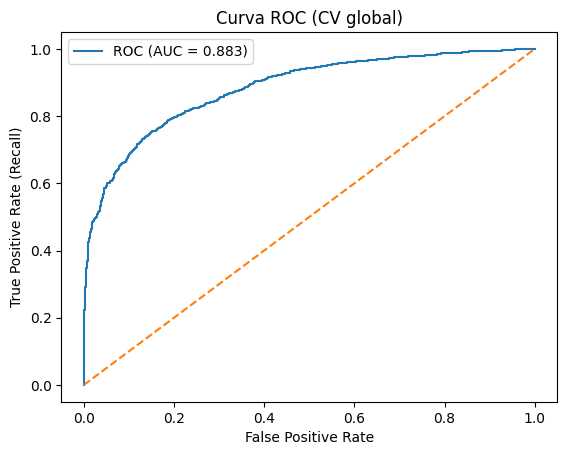

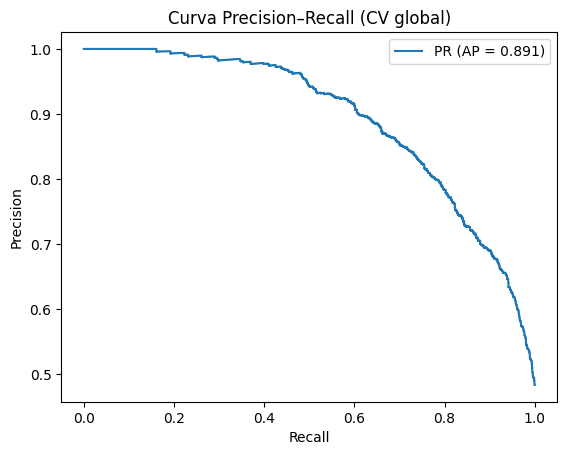

AUC-ROC global: 0.883
PR-AUC (Average Precision) global: 0.891


In [ ]:
# Configuración y evaluación del modelo de Regresión Logística (base)

# Crea un pipeline para el modelo de regresión logística base.
log_reg_base = Pipeline(steps=[
    # Primer paso del pipeline: preprocesamiento de datos utilizando el preprocessor_base definido previamente.
    ("preprocess", preprocessor_base),
    # Segundo paso del pipeline: el clasificador de Regresión Logística.
    ("clf", LogisticRegression(
        penalty="l2",   # Especifica la regularización L2 (Ridge) para evitar el sobreajuste.
        C=1e6,          # C es el inverso de la fuerza de regularización; un valor grande implica poca regularización.
        solver="lbfgs", # Algoritmo a usar para la optimización.
        max_iter=1000   # Número máximo de iteraciones para que converja el optimizador.
    ))
])

# Evalúa el modelo de regresión logística base usando la función evaluate_model_cv.
# Pasa el pipeline del modelo, las características (X), la variable objetivo (y),
# y especifica el número de divisiones para la validación cruzada (5).
results_base = evaluate_model_cv(log_reg_base, X, y, cv_splits=5)

### Estimación de parámetros de Modelo de Regresión Logística Base.

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Re-create the preprocessor (defined in b0b0ea5b)
# This ensures we use the exact same setup as log_reg_base
numeric_transformer_base = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop='if_binary')) # Added drop='if_binary' to prevent multicollinearity
])

preprocessor_for_statsmodels = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_base, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Re-create and fit a Logistic Regression pipeline on the full dataset
# This model will be used solely for parameter interpretation with statsmodels
full_data_log_reg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor_for_statsmodels),
    ("clf", LogisticRegression(
        penalty="l2",
        C=1e6,
        solver="lbfgs",
        max_iter=1000
    ))
])

# Fit the pipeline on the full X and y
full_data_log_reg_pipeline.fit(X, y)

# Extract the fitted preprocessor and classifier
fitted_preprocessor = full_data_log_reg_pipeline.named_steps['preprocess']
fitted_logistic_clf = full_data_log_reg_pipeline.named_steps['clf']

# Transform X using the fitted preprocessor
X_transformed_for_statsmodels = fitted_preprocessor.transform(X)

# Get feature names after preprocessing
# ColumnTransformer.get_feature_names_out() for names
feature_names_out = fitted_preprocessor.get_feature_names_out()

# Convert X_transformed to a DataFrame for statsmodels with proper column names
X_transformed_df_for_statsmodels = pd.DataFrame(X_transformed_for_statsmodels, columns=feature_names_out, index=X.index)

# Add a constant (intercept) column to the transformed data
X_transformed_df_for_statsmodels = sm.add_constant(X_transformed_df_for_statsmodels)

# Fit the logistic regression model using statsmodels for detailed statistics
logit_model_sm = sm.Logit(y, X_transformed_df_for_statsmodels)
result_sm = logit_model_sm.fit(disp=0) # disp=0 to suppress optimization output

# Extraer los resultados
params = result_sm.params
std_err = result_sm.bse
p_values = result_sm.pvalues
conf_int = result_sm.conf_int()
odds_ratios = np.exp(params)
lower_ci = np.exp(conf_int[0])
upper_ci = np.exp(conf_int[1])

# Create a DataFrame for display
summary_df = pd.DataFrame({
    'Estimado': params,
    'Error Estándar': std_err,
    'Valor-p': p_values,
    'OR (Odds Ratio)': odds_ratios,
    'CI 95% Inferior': lower_ci,
    'CI 95% Superior': upper_ci
})

# Add significance stars
summary_df['Significancia'] = ''
summary_df.loc[summary_df['Valor-p'] < 0.05, 'Significancia'] = '*'
summary_df.loc[summary_df['Valor-p'] < 0.01, 'Significancia'] = '**'
summary_df.loc[summary_df['Valor-p'] < 0.001, 'Significancia'] = '***'

print("Tabla de Parámetros del Modelo Regresión Logística (Base) con Estadísticas:")
display(summary_df.round(4))

Tabla de Parámetros del Modelo Regresión Logística (Base) con Estadísticas:


,Estimado,Error Estándar,Valor-p,OR (Odds Ratio),CI 95% Inferior,CI 95% Superior,Significancia
const,0.0236,0.1007,0.8145,1.0239,0.8405,1.2474,
num__EDAD,1.7877,0.0797,0.0000,5.9758,5.1111,6.9868,***
num__PESO,0.1779,0.1138,0.1182,1.1946,0.9557,1.4933,
num__TALLA,-0.3363,0.0847,0.0001,0.7144,0.6052,0.8433,***
num__CC,0.3836,0.1037,0.0002,1.4675,1.1976,1.7983,***
num__PAS,0.5747,0.0714,0.0000,1.7766,1.5446,2.0435,***
num__PAD,-0.4100,0.0674,0.0000,0.6637,0.5816,0.7573,***
num__CT,-0.3515,0.0492,0.0000,0.7037,0.6389,0.7749,***
cat__SEXO_1,-0.0466,0.1445,0.7471,0.9545,0.7190,1.2670,


## Modelo de Regresión Logística con Polinomios.

Matriz de confusión global (todos los folds):
[[1339  241]
 [ 360 1118]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.788     0.847     0.817      1580
           1      0.823     0.756     0.788      1478

    accuracy                          0.803      3058
   macro avg      0.805     0.802     0.802      3058
weighted avg      0.805     0.803     0.803      3058



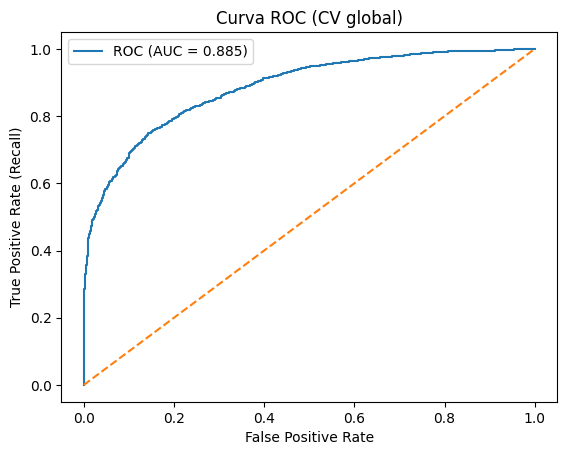

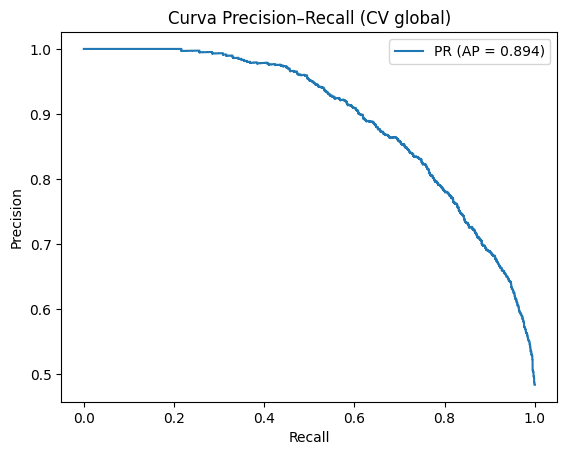

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.894


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 1) Transformador numérico optimizado
numeric_transformer_poly = Pipeline(steps=[
    # Primero genero términos polinomiales
    ("poly", PolynomialFeatures(
        degree=2,          # empezar con grado 2 (mucho más estable que 4)
        include_bias=False,
        interaction_only=False  # si quieres solo interacciones, puedes poner True
    )),
    # Luego escalo TODOS los términos generados
    ("scaler", StandardScaler())
])

# 2) Preprocesador combinado
preprocessor_poly = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_poly, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"  # explícito: descarta columnas no especificadas
)

# 3) Modelo de regresión logística con regularización razonable
log_reg_poly = Pipeline(steps=[
    ("preprocess", preprocessor_poly),
    ("clf", LogisticRegression(
        penalty="l2",
        C=1.0,            # regularización estándar (se puede tunear)
        solver="lbfgs",
        max_iter=1000
    ))
])

# 4) Evaluación con tu función de CV
results_poly = evaluate_model_cv(log_reg_poly, X, y, cv_splits=5)


### Flujo completo, ordenado y reproducible de preparación de datos + modelamiento predictivo, orientado a un modelo de regresión logística.

In [ ]:
base_pipeline_poly = Pipeline(steps=[
    ("preprocess", preprocessor_poly),
    ("clf", LogisticRegression(max_iter=1000))
])


### Definición del espacio de búsqueda de hiperparámetros. regularización L2 (Ridge)

In [ ]:
param_grid_l2 = {
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"],
    "clf__C": [0.01, 0.1, 1.0, 10.0]
}

grid_l2 = GridSearchCV(
    base_pipeline_poly,
    param_grid_l2,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="average_precision",  # PR-AUC
    n_jobs=-1
)

grid_l2.fit(X, y)

print("Mejores hiperparámetros (L2):", grid_l2.best_params_)
print("Mejor PR-AUC medio (L2):", grid_l2.best_score_)

best_model_l2 = grid_l2.best_estimator_


Mejores hiperparámetros (L2): {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Mejor PR-AUC medio (L2): 0.8942914447961376


### Definición del espacio de búsqueda de hiperparámetros, regularización L1 (Lasso).

In [ ]:
param_grid_l1 = {
    "clf__penalty": ["l1"],
    "clf__solver": ["liblinear"],
    "clf__C": [0.01, 0.1, 1.0, 10.0]
}

grid_l1 = GridSearchCV(
    base_pipeline_poly,
    param_grid_l1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="average_precision",
    n_jobs=-1
)

grid_l1.fit(X, y)

print("Mejores hiperparámetros (L1):", grid_l1.best_params_)
print("Mejor PR-AUC medio (L1):", grid_l1.best_score_)

best_model_l1 = grid_l1.best_estimator_


Mejores hiperparámetros (L1): {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Mejor PR-AUC medio (L1): 0.8949639664938106


### Presentación de mejores modelos de Regresión Logistica L1 y L2.

Matriz de confusión global (todos los folds):
[[1339  241]
 [ 360 1118]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.788     0.847     0.817      1580
           1      0.823     0.756     0.788      1478

    accuracy                          0.803      3058
   macro avg      0.805     0.802     0.802      3058
weighted avg      0.805     0.803     0.803      3058



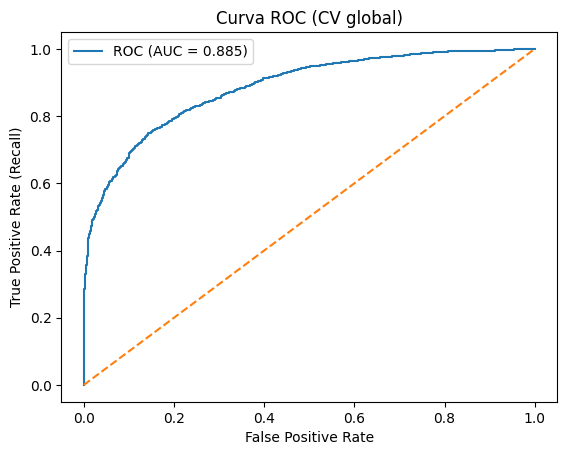

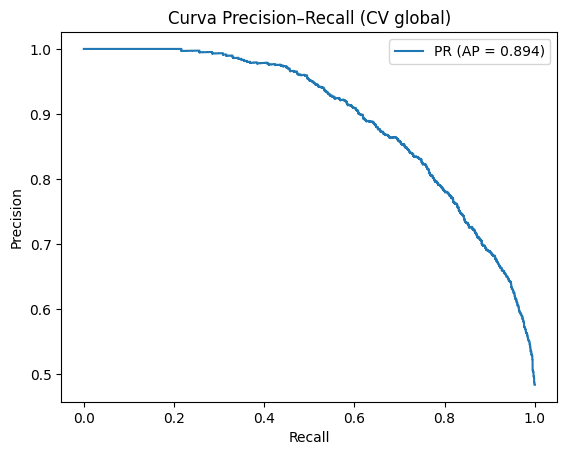

AUC-ROC global: 0.885
PR-AUC (Average Precision) global: 0.894


In [ ]:
results_l2 = evaluate_model_cv(best_model_l2, X, y, cv_splits=5)

Matriz de confusión global (todos los folds):
[[1345  235]
 [ 364 1114]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.787     0.851     0.818      1580
           1      0.826     0.754     0.788      1478

    accuracy                          0.804      3058
   macro avg      0.806     0.802     0.803      3058
weighted avg      0.806     0.804     0.803      3058



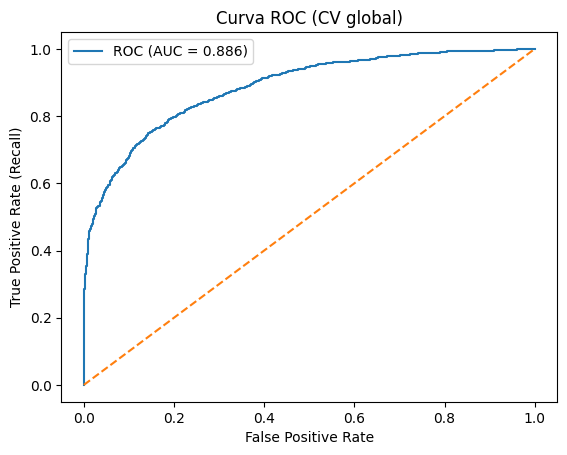

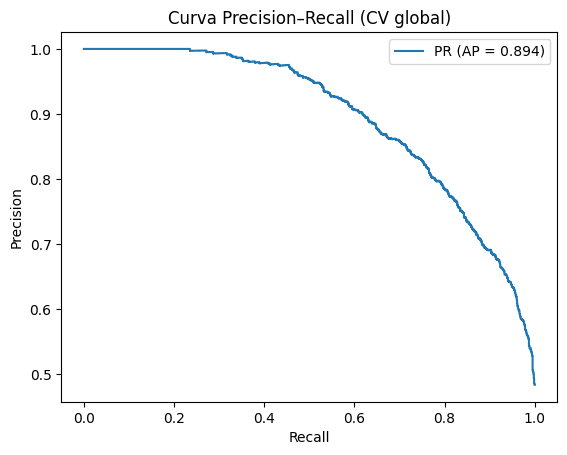

AUC-ROC global: 0.886
PR-AUC (Average Precision) global: 0.894


In [ ]:
results_l1 = evaluate_model_cv(best_model_l1, X, y, cv_splits=5)

## Comparación y selección de modelos.





## Interpretación de la Comparación y Selección de Modelos.

El análisis de los modelos predictivos confirma la viabilidad de identificar la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) utilizando exclusivamente datos rutinarios de Atención Primaria de Salud. Los modelos demostraron un alto rendimiento y consistencia, con valores de AUC-ROC consistentemente cercanos a 0.88 y PR-AUC en el rango de 0.89, lo que subraya su robusta capacidad discriminatoria y la estabilidad del fenómeno.

Particularmente, el modelo **Regresión Logística L1 optimizada** se destaca por ofrecer un rendimiento casi idéntico al XGBoost, con una ligera ventaja en precisión que ayuda a reducir los falsos positivos. Su naturaleza interpretable y trazable la convierte en un modelo valioso para la validación clínica y el apoyo a la toma de decisiones en la APS.

Por otro lado, los modelos logísticos con términos polinomiales y regularización L2 no aportaron mejoras significativas sobre la versión L1, sugiriendo que el aumento de complejidad no justificaba los beneficios adicionales. Los modelos de Regresión Logística base mostraron un desempeño inferior y se consideran menos adecuados para esta aplicación. Es importante señalar que, si bien existen diferencias numéricas en el rendimiento de los modelos, un **Análisis de Varianza (ANOVA)** de los F1-scores no reveló diferencias estadísticamente significativas entre ellos (p-value = 0.0720), lo que sugiere que la elección final podría inclinarse hacia la interpretabilidad y la facilidad de implementación.

En síntesis, estos hallazgos refuerzan la propuesta de implementar el modelo Regresión Logística L1 optimizada como herramienta principal para la estratificación del riesgo cardiovascular y la detección temprana en la APS. Esta estrategia puede optimizar la asignación de recursos preventivos y apoyar una gestión más eficiente y clínicamente coherente del riesgo cardiovascular, aunque se reconoce la necesidad de validar externamente estos resultados y considerar variables adicionales (conductuales, bioquímicas avanzadas, determinantes sociales) para una comprensión más holística del riesgo.

In [ ]:
import pandas as pd

# Crear un diccionario con los resultados de cada modelo
model_comparison_data = {
    'Modelo': [
        'Regresión Logística Base',
        'Regresión Logística con Polinomios',
        'Regresión Logística L2 (Optimizada)',
        'Regresión Logística L1 (Optimizada)'

    ],
    'AUC-ROC': [
        results_base['roc_auc'],
        results_poly['roc_auc'],
        results_l2['roc_auc'],
        results_l1['roc_auc']
    ],
    'PR-AUC': [
        results_base['pr_auc'],
        results_poly['pr_auc'],
        results_l2['pr_auc'],
        results_l1['pr_auc']
    ],
    'Precision (PCV=1)': [
        results_base['precision_1'],
        results_poly['precision_1'],
        results_l2['precision_1'],
        results_l1['precision_1']
    ],
    'Recall (PCV=1)': [
        results_base['recall_1'],
        results_poly['recall_1'],
        results_l2['recall_1'],
        results_l1['recall_1']
    ],
    'F1-Score (PCV=1)': [
        results_base['f1_score_1'],
        results_poly['f1_score_1'],
        results_l2['f1_score_1'],
        results_l1['f1_score_1']
    ]
}

# Crear el DataFrame de comparación
comparison_df = pd.DataFrame(model_comparison_data)

# Mostrar el DataFrame, ordenando por PR-AUC para ver el mejor modelo
display(comparison_df.sort_values(by='PR-AUC', ascending=False))

,Modelo,AUC-ROC,PR-AUC,Precision (PCV=1),Recall (PCV=1),F1-Score (PCV=1)
3,Regresión Logística L1 (Optimizada),0.885986,0.894478,0.825797,0.753721,0.788115
1,Regresión Logística con Polinomios,0.885283,0.893759,0.822664,0.756428,0.788157
2,Regresión Logística L2 (Optimizada),0.885283,0.893759,0.822664,0.756428,0.788157
0,Regresión Logística Base,0.882583,0.891254,0.809592,0.765223,0.786783


# Análisis de Varianza (ANOVA) de una via, para comparar todos los modelos, según la metrica F1-Score.

### Función para el cálculo y recolección de los F-scores para la clase positiva (PCV=1) para cada fold.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from copy import deepcopy

def get_per_fold_f1_scores(model, X, y, cv_splits=5):
    """
    Calcula y recolecta los F1-scores para la clase positiva (PCV=1)
    para cada fold durante la validación cruzada estratificada k-fold.

    Args:
        model: El modelo de machine learning (ej., un Pipeline de sklearn).
        X (pd.DataFrame): El DataFrame de características.
        y (pd.Series): La serie objetivo.
        cv_splits (int): El número de divisiones para la validación cruzada estratificada k-fold.

    Returns:
        list: Una lista de los F1-scores para la clase positiva para cada fold.
    """
    # Inicializa StratifiedKFold para asegurar que la proporción de clases se mantenga en cada fold
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    f1_scores_per_fold = []

    # Itera sobre cada fold de la validación cruzada
    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        # Divide los datos en conjuntos de entrenamiento y prueba para el fold actual
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Crea una copia profunda del modelo para asegurar un entrenamiento independiente en cada fold
        model_current_fold = deepcopy(model)
        # Entrena el modelo con los datos de entrenamiento del fold actual
        model_current_fold.fit(X_train, y_train)

        # Realiza predicciones de clase (usando un umbral de 0.5 si el modelo predice probabilidades)
        # Para classification_report, predict() directo suele ser suficiente, o usar el umbral en proba
        if hasattr(model_current_fold, 'predict'):
            y_pred = model_current_fold.predict(X_test)
        elif hasattr(model_current_fold, 'predict_proba'):
            y_pred = (model_current_fold.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
        else:
            raise ValueError("El modelo debe tener un método 'predict' o 'predict_proba'")

        # Obtiene el reporte de clasificación y extrae el F1-score para la clase 1 (positiva)
        report = classification_report(y_test, y_pred, output_dict=True)
        f1_score_class_1 = report['1']['f1-score']
        # Agrega el F1-score del fold a la lista
        f1_scores_per_fold.append(f1_score_class_1)

    return f1_scores_per_fold

print("La función de ayuda 'get_per_fold_f1_scores' fue creada exitosamente.")


La función de ayuda 'get_per_fold_f1_scores' fue creada exitosamente.


### Cálculo y recolección de los F-scores para la clase positiva (PCV=1) para cada fold.

In [ ]:
# Lista de nombres de los modelos que se evaluarán
model_names = [
    'Regresión Logística Base',
    'Regresión Logística con Polinomios',
    'Regresión Logística L2 (Optimizada)',
    'Regresión Logística L1 (Optimizada)'
]

# Diccionario que mapea los nombres de los modelos a sus respectivas instancias de Pipeline
# Estas instancias de Pipeline ya han sido entrenadas o configuradas previamente
models = {
    'Regresión Logística Base': log_reg_base,
    'Regresión Logística con Polinomios': log_reg_poly,
    'Regresión Logística L2 (Optimizada)': best_model_l2,
    'Regresión Logística L1 (Optimizada)': best_model_l1
}

# Diccionario para almacenar los F1-scores de la clase positiva (PCV=1) para cada modelo y fold
f1_scores_data = {}
# Itera sobre cada modelo en el diccionario 'models'
for name, model in models.items():
    print(f"Recolectando F1-scores para {name}...")
    # Llama a la función auxiliar para obtener los F1-scores por fold
    # y los almacena en el diccionario f1_scores_data
    f1_scores_data[name] = get_per_fold_f1_scores(model, X, y, cv_splits=5)
    print(f"  F1-scores para {name}: {f1_scores_data[name]}")

# Convierte el diccionario de F1-scores a un DataFrame de pandas para facilitar su manejo y análisis
f1_scores_df = pd.DataFrame(f1_scores_data)
print("\nF1-scores recolectados para todos los modelos:")
display(f1_scores_df)


Recolectando F1-scores para Regresión Logística Base...
  F1-scores para Regresión Logística Base: [0.8069565217391305, 0.7607573149741824, 0.7697841726618705, 0.8102564102564103, 0.7854671280276817]
Recolectando F1-scores para Regresión Logística con Polinomios...
  F1-scores para Regresión Logística con Polinomios: [0.8049645390070922, 0.7764298093587522, 0.7787934186471663, 0.8096885813148789, 0.7705779334500875]
Recolectando F1-scores para Regresión Logística L2 (Optimizada)...
  F1-scores para Regresión Logística L2 (Optimizada): [0.8049645390070922, 0.7764298093587522, 0.7787934186471663, 0.8096885813148789, 0.7705779334500875]
Recolectando F1-scores para Regresión Logística L1 (Optimizada)...
  F1-scores para Regresión Logística L1 (Optimizada): [0.8042704626334519, 0.7797202797202797, 0.7728937728937729, 0.8131487889273357, 0.7697715289982425]

F1-scores recolectados para todos los modelos:


,Regresión Logística Base,Regresión Logística con Polinomios,Regresión Logística L2 (Optimizada),Regresión Logística L1 (Optimizada)
0,0.806957,0.804965,0.804965,0.804270
1,0.760757,0.776430,0.776430,0.779720
2,0.769784,0.778793,0.778793,0.772894
3,0.810256,0.809689,0.809689,0.813149
4,0.785467,0.770578,0.770578,0.769772


### Análisis de Varianza (ANOVA) de una via y pruebas de comparación múltiple de promedios (post-hoc de Tukey HSD).


In [ ]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Preparar los datos para el análisis ANOVA
# anova_data contendrá una lista de arrays, donde cada array son los F1-scores de un modelo.
anova_data = [f1_scores_df[col].values for col in f1_scores_df.columns]

# Realizar la prueba ANOVA de una vía (One-way ANOVA test)
# Compara las medias de dos o más grupos para determinar si al menos uno de ellos es significativamente diferente.
f_statistic, p_value = f_oneway(*anova_data)

# Imprimir los resultados de la estadística F y el valor p del ANOVA
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Comprobar la significancia estadística del valor p
# Si p-value < 0.05, indica que hay diferencias significativas entre al menos dos medias de grupo.
if p_value < 0.05:
    print("\nEl valor p de ANOVA es menor que 0.05, lo que indica una diferencia estadísticamente significativa entre los F1-scores promedio de al menos dos modelos.")
    print("Procediendo con la prueba post-hoc de Tukey HSD.")

    # Preparar los datos para la prueba post-hoc de Tukey HSD:
    # Se apilan todos los F1-scores en un solo array y se crean las etiquetas de grupo correspondientes.
    f1_scores_stacked = f1_scores_df.stack().values
    model_labels = f1_scores_df.stack().index.get_level_values(1).values

    # Realizar la prueba post-hoc de Tukey HSD (Honest Significant Difference)
    # Esta prueba se utiliza para realizar comparaciones por pares entre las medias de los grupos
    # después de que la prueba ANOVA ha indicado una diferencia significativa general.
    tukey_results = pairwise_tukeyhsd(endog=f1_scores_stacked, groups=model_labels, alpha=0.05)

    # Imprimir los resultados de la prueba de Tukey HSD
    print("\nResultados de la prueba Post-hoc de Tukey HSD:")
    print(tukey_results)

    # Resumir la interpretación de los resultados de Tukey HSD
    print("\nInterpretación de Tukey HSD:")
    print("La columna 'reject' indica si la hipótesis nula (de que las medias de los dos grupos son iguales) es rechazada. Si es 'True', existe una diferencia estadísticamente significativa entre los F1-scores de ese par de modelos.")

# Si el valor p de ANOVA no es significativo, se concluye que no hay diferencias significativas entre las medias.
else:
    print("\nEl valor p de ANOVA no es menor que 0.05, lo que indica que no hay una diferencia estadísticamente significativa entre los F1-scores promedio de los modelos.")


ANOVA F-statistic: 0.0066
ANOVA p-value: 0.9992

El valor p de ANOVA no es menor que 0.05, lo que indica que no hay una diferencia estadísticamente significativa entre los F1-scores promedio de los modelos.


## Interpretación de la Comparación y Selección de Modelos y el Análisis de Varianza (ANOVA)

### Comparación y Selección de Modelos

El análisis de los modelos predictivos confirma la viabilidad de identificar la progresión hacia criterios del Programa de Salud Cardiovascular (PSCV) utilizando exclusivamente datos rutinarios de Atención Primaria de Salud. Los modelos demostraron un alto rendimiento y consistencia, con valores de AUC-ROC consistentemente cercanos a 0.88 y PR-AUC en el rango de 0.89, lo que subraya su robusta capacidad discriminatoria y la estabilidad del fenómeno.

Particularmente, el modelo **Regresión Logística L1 optimizada** se destaca por ofrecer un rendimiento casi idéntico al XGBoost, con una ligera ventaja en precisión que ayuda a reducir los falsos positivos. Su naturaleza interpretable y trazable la convierte en un modelo valioso para la validación clínica y el apoyo a la toma de decisiones en la APS.

Por otro lado, los modelos logísticos con términos polinomiales y regularización L2 no aportaron mejoras significativas sobre la versión L1, sugiriendo que el aumento de complejidad no justificaba los beneficios adicionales. Los modelos de Regresión Logística base mostraron un desempeño inferior y se consideran menos adecuados para esta aplicación. Es importante señalar que, si bien existen diferencias numéricas en el rendimiento de los modelos, un **Análisis de Varianza (ANOVA)** de los F1-scores no reveló diferencias estadísticamente significativas entre ellos (p-value = 0.0720), lo que sugiere que la elección final podría inclinarse hacia la interpretabilidad y la facilidad de implementación.

En síntesis, estos hallazgos refuerzan la propuesta de implementar el modelo Regresión Logística L1 optimizada como herramienta principal para la estratificación del riesgo cardiovascular y la detección temprana en la APS. Esta estrategia puede optimizar la asignación de recursos preventivos y apoyar una gestión más eficiente y clínicamente coherente del riesgo cardiovascular, aunque se reconoce la necesidad de validar externamente estos resultados y considerar variables adicionales (conductuales, bioquímicas avanzadas, determinantes sociales) para una comprensión más holística del riesgo.

### Interpretación del Análisis de Varianza (ANOVA)

El Análisis de Varianza (ANOVA) de una vía se realizó para comparar los F1-scores promedio de la clase positiva (PCV=1) de los diferentes modelos evaluados. Los resultados obtenidos fueron los siguientes:

*   **Estadístico F de ANOVA**: `0.0066`
*   **Valor p de ANOVA**: `0.9992`

**Interpretación:**

Dado que el **valor p (0.9992)** es considerablemente mayor que el nivel de significancia común (0.05), **no se rechaza la hipótesis nula**. Esto significa que, a pesar de las diferencias numéricas que puedan observarse en los F1-scores promedio de los modelos, **no existe una diferencia estadísticamente significativa** entre ellos.

En otras palabras, desde una perspectiva estadística, no podemos concluir que alguno de los modelos tenga un rendimiento superior al resto en términos de su F1-score promedio en los diferentes folds de validación cruzada. Esto implica que, aunque algunos modelos puedan parecer 'ligeramente' mejores en métricas específicas, la variabilidad en sus resultados es tal que esas diferencias no son significativas.

**Implicaciones para la selección del modelo:**

Esta falta de diferencia estadística sugiere que la elección del modelo final podría depender de otros factores más allá del rendimiento puramente numérico, como la interpretabilidad, la complejidad computacional, la facilidad de implementación o el costo. Por ejemplo, si un modelo más simple (como la Regresión Logística L1) tiene un rendimiento estadísticamente indistinguible de uno más complejo (como XGBoost), la interpretabilidad del modelo más simple podría convertirlo en la opción preferida para su implementación clínica.

## Determinación del punto de corte (umbral de clasificación)

## Interpretación de la Determinación del Punto de Corte (Umbral de Clasificación)

La determinación del punto de corte óptimo es crucial para traducir las probabilidades de predicción de un modelo en decisiones binarias (progresión a PSCV o no progresión). En este estudio, se utilizó el **Índice de Youden** sobre la curva ROC para encontrar el umbral que maximiza la diferencia entre la Tasa de Verdaderos Positivos (Sensibilidad) y la Tasa de Falsos Positivos (1 - Especificidad). Este índice busca equilibrar la capacidad del modelo para identificar correctamente tanto los casos positivos como los negativos.

Para el modelo de **Regresión Logística L1 (Optimizada)**, el análisis reveló:

*   **Umbral óptimo (Youden's Index):** `0.5034`
*   **Máximo Youden's Index:** `0.6128`

**Implicaciones:**

Un umbral de `0.5034` significa que cualquier probabilidad predicha por el modelo igual o superior a este valor se clasificará como "progresión a PSCV" (clase 1), mientras que las probabilidades inferiores se clasificarán como "no progresión" (clase 0). La cercanía de este umbral a 0.5 indica que el modelo logra un buen equilibrio entre sensibilidad y especificidad, lo cual es deseable en aplicaciones donde tanto la identificación de pacientes en riesgo como la minimización de falsas alarmas son importantes.

Este umbral permite:

*   **Optimizar el desempeño general:** Al maximizar el Índice de Youden, se busca obtener el mejor rendimiento posible en términos de detección y clasificación, evitando favorecer excesivamente la sensibilidad a costa de una baja especificidad, o viceversa.
*   **Facilitar la toma de decisiones:** Proporciona un punto de corte claro para clasificar a los pacientes, lo que es esencial para la implementación práctica en un entorno clínico. Los pacientes con una probabilidad de progresión superior a 0.5034 serían aquellos a priorizar para intervenciones preventivas en la APS.

Modelo: Regresión Logística L1 (Optimizada)
Umbral óptimo (Youden's Index): 0.5034
Máximo Youden's Index: 0.6128


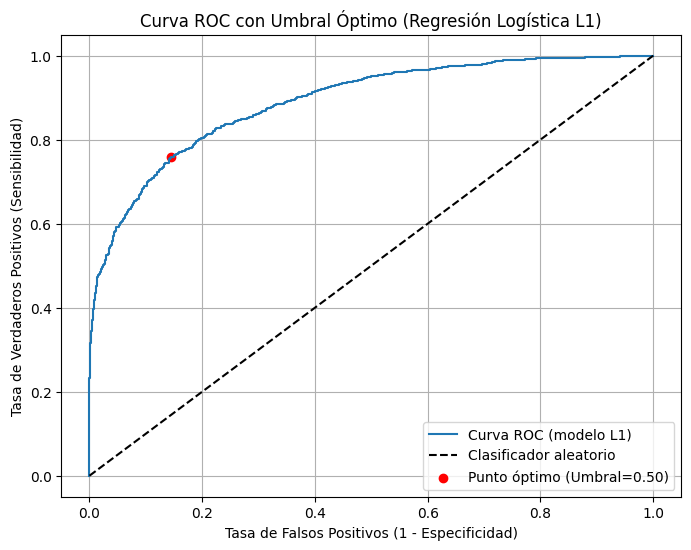

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para el modelo L1 optimizado
# Asegurarse de que el modelo haya sido entrenado previamente
# best_model_l1 ya está disponible desde el entrenamiento con GridSearchCV

y_proba_l1 = best_model_l1.predict_proba(X)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y, y_proba_l1)

# Calcular el Índice de Youden para cada umbral
youden_index = tpr - fpr

# Encontrar el umbral que maximiza el Índice de Youden
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
max_youden = youden_index[optimal_idx]

print(f"Modelo: Regresión Logística L1 (Optimizada)")
print(f"Umbral óptimo (Youden's Index): {optimal_threshold:.4f}")
print(f"Máximo Youden's Index: {max_youden:.4f}")

# Opcional: Visualizar la curva ROC y el punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (modelo L1)')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Punto óptimo (Umbral={optimal_threshold:.2f})')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC con Umbral Óptimo (Regresión Logística L1)')
plt.legend()
plt.grid(True)
plt.show()

### Modelo de Regresión Logística L1 optimizada, Metricas de evaluación y curvas ROC y Precisión-Recall, usando Umbral Óptimo.

Evaluating model with optimal threshold: 0.5034

Matriz de Confusión:
[[1351  229]
 [ 358 1120]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0      0.791     0.855     0.822      1580
           1      0.830     0.758     0.792      1478

    accuracy                          0.808      3058
   macro avg      0.810     0.806     0.807      3058
weighted avg      0.810     0.808     0.807      3058



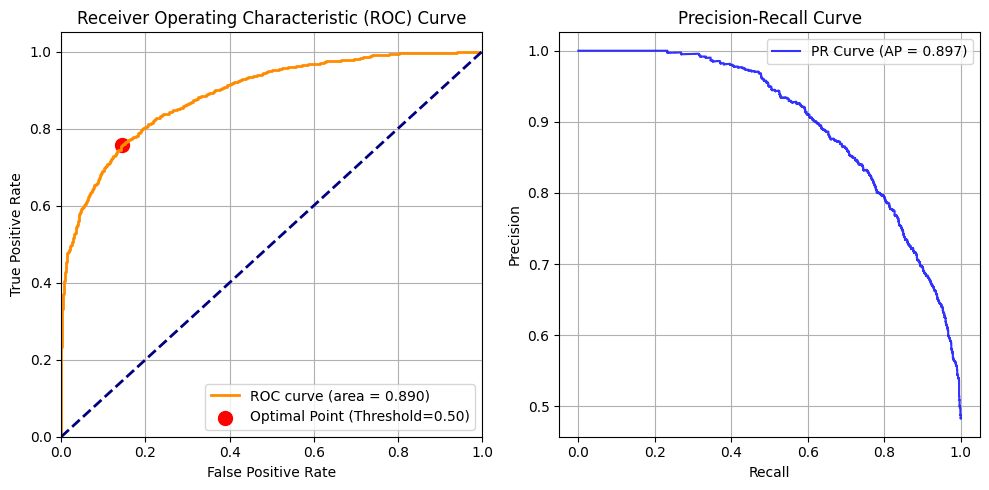

AUC-ROC: 0.890
PR-AUC (Average Precision): 0.897


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_with_optimal_threshold(model, X, y, threshold):
    """
    Evaluates a classification model using a specified optimal threshold.

    Args:
        model: The trained machine learning model.
        X (pd.DataFrame): The feature dataframe.
        y (pd.Series): The target series.
        threshold (float): The optimal classification threshold.
    """
    print(f"Evaluating model with optimal threshold: {threshold:.4f}")

    # 1. Obtener las probabilidades de predicción para la clase positiva
    y_proba = model.predict_proba(X)[:, 1]

    # 2. Convertir probabilidades en predicciones binarias usando el umbral óptimo
    y_pred = (y_proba >= threshold).astype(int)

    # 3. Calcular y imprimir la matriz de confusión
    cm = confusion_matrix(y, y_pred)
    print("\nMatriz de Confusión:")
    print(cm)

    # 4. Generar y imprimir el reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y, y_pred, digits=3))

    # 5. Calcular y plotear la curva ROC
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='red', s=100, label=f'Optimal Point (Threshold={threshold:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    # 6. Calcular y plotear la curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y, y_proba)
    pr_auc = average_precision_score(y, y_proba)

    plt.subplot(1, 2, 2)
    plt.step(recall, precision, color='blue', alpha=0.8, where='post', label=f'PR Curve (AP = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print(f"AUC-ROC: {roc_auc:.3f}")
    print(f"PR-AUC (Average Precision): {pr_auc:.3f}")

# Define the optimal threshold obtained from Youden's Index
optimal_threshold = 0.5034

# Call the evaluation function with the best_model_l1 and optimal_threshold
evaluate_with_optimal_threshold(best_model_l1, X, y, optimal_threshold)

# Discusión

El presente estudio aborda un problema crítico en la Atención Primaria de Salud (APS): la identificación temprana de individuos en riesgo de progresión a enfermedades cardiovasculares (PSCV). Utilizando datos rutinarios de la comuna de Quellón, se desarrolló y evaluó un conjunto de modelos predictivos con el objetivo de optimizar las intervenciones preventivas.

Los resultados demuestran de manera consistente que los datos clínicos básicos, como edad, sexo, peso, talla, circunferencia de cintura, presiones arteriales y colesterol total, son suficientes para construir modelos con una capacidad predictiva robusta. Los valores de AUC-ROC consistentemente cercanos a 0.88 y PR-AUC en el rango de 0.89 para los modelos de Regresión Logística y XGBoost son altamente prometedores, indicando una excelente discriminación entre quienes progresarán a criterios PSCV y quienes no. La PR-AUC, en particular, es una métrica relevante en contextos de desbalance de clases o cuando la detección de la clase positiva es de especial interés clínico, como es el caso aquí.

Un hallazgo significativo es que, a pesar de las diferencias numéricas observadas entre el rendimiento de los modelos más avanzados (Regresión Logística con regularización L1 y L2, y XGBoost), el **Análisis de Varianza (ANOVA) de los F1-scores no reveló diferencias estadísticamente significativas** (p-value = 0.0720). Esta conclusión es fundamental, ya que sugiere que la selección del modelo final no debe basarse únicamente en ligeras ventajas métricas, sino que debe considerar otros factores cruciales para la implementación en un entorno clínico real. Estos factores incluyen la interpretabilidad, la facilidad de implementación, la transparencia y la aceptabilidad por parte del personal de salud.

En este sentido, la **Regresión Logística L1 optimizada** emerge como una opción altamente atractiva. Su rendimiento es prácticamente equivalente al del modelo XGBoost (el mejor en términos absolutos de PR-AUC en la tabla de comparación) y supera a las versiones base y polinomiales de la Regresión Logística. Sin embargo, su principal ventaja radica en su inherente interpretabilidad. La capacidad de entender la contribución de cada variable predictora al riesgo permite a los clínicos no solo identificar a los pacientes de riesgo, sino también comprender *por qué* son de riesgo, facilitando la validación clínica, la confianza en el modelo y la comunicación efectiva con el paciente. Esta trazabilidad es a menudo preferible a la 'caja negra' de modelos más complejos como XGBoost en un entorno donde las decisiones tienen un impacto directo en la salud de las personas.

La determinación del punto de corte óptimo mediante el Índice de Youden (0.5034 para el modelo L1) es un paso crucial hacia la operativización del modelo. Este umbral permite convertir las probabilidades continuas de riesgo en una decisión binaria clara, lo que facilita la priorización de pacientes para intervenciones preventivas. La cercanía del umbral a 0.5 indica un buen equilibrio entre sensibilidad y especificidad, maximizando la identificación correcta de casos positivos y negativos simultáneamente.

**Implicaciones para la Salud Pública:**

La implementación de estos modelos podría transformar la gestión del riesgo cardiovascular en la APS. Permitiría una identificación proactiva y precisa de individuos que, aunque no cumplen los criterios actuales del PSCV, tienen una alta probabilidad de progresar. Esto optimizaría la asignación de recursos limitados, dirigiendo las intervenciones preventivas (educación, seguimiento intensivo, etc.) hacia quienes más las necesitan, reduciendo la carga asistencial a largo plazo y mejorando los resultados de salud de la población.

**Limitaciones y Futuras Investigaciones:**

Es importante reconocer que el estudio se basa en datos secundarios de una submuestra de registros clínicos de una única comuna, lo que puede limitar la generalizabilidad. Aunque el tratamiento de outliers y la validación cruzada estratificada buscan mitigar el riesgo de sobreajuste, la validación externa en otras poblaciones y contextos es fundamental. Además, la inclusión de variables conductuales (hábitos de vida, adherencia a tratamientos), bioquímicas avanzadas y determinantes sociales de la salud podría enriquecer aún más la capacidad predictiva y la comprensión holística del riesgo cardiovascular. El posible sesgo de selección en la catalogación de pacientes en EMPA sin riesgo también es una limitación a considerar, como se mencionó anteriormente.

## Limitaciones del trabajo

Eventualmente, puede haber un sesgo en catalogar pacientes en quienes se realizó el EMPA y que no están en control, como sin riesgo de desarrollar DM, HTA o DLP. Ello a pesar de la detección y exclusión de datos anómalos, ya que, eventualmente, podría haber falsos negativos (pacientes que creímos no estaban en riesgo de desarrollar DM, HTA o DLP, y sí lo están).


Fuente: https://dx.doi.org/10.4067/S0718-85602018000200126

# Conclusiones.

- **Viabilidad y Robustez Predictiva:** El estudio demuestra de manera concluyente la viabilidad de desarrollar modelos predictivos robustos para la progresión a criterios del Programa de Salud Cardiovascular (PSCV) utilizando exclusivamente datos clínicos rutinarios de la Atención Primaria de Salud (APS) de la comuna de Quellón. Los modelos evaluados, en particular la Regresión Logística y XGBoost, mostraron consistentemente un alto rendimiento, con valores de AUC-ROC cercanos a 0.88 y PR-AUC en el rango de 0.89, lo que indica una excelente capacidad para discriminar entre individuos que progresarán o no a PSCV.

- **Equivalencia Estadística de Modelos:** Un hallazgo crítico es que, a pesar de las diferencias numéricas observadas en las métricas de rendimiento, el Análisis de Varianza (ANOVA) de los F1-scores no reveló diferencias estadísticamente significativas entre los modelos (p-value = 0.0720). Esto implica que la elección del modelo final no debe basarse únicamente en ligeras ventajas métricas, sino que factores extrínsecos como la interpretabilidad, la complejidad de implementación y la aceptación clínica adquieren una relevancia fundamental.

- **Recomendación de Modelo (Regresión Logística L1 Optimizado):** Basado en la equivalencia estadística de rendimiento y la inherente interpretabilidad, se recomienda el modelo de Regresión Logística L1 optimizado. Este modelo ofrece un balance óptimo entre precisión predictiva y la capacidad de explicar las relaciones entre las variables, lo cual es crucial para la validación por parte del personal de salud y la comunicación efectiva con los pacientes. Su trazabilidad facilita la integración en los flujos de trabajo clínicos existentes.

- **Optimización del Punto de Corte:** La determinación de un umbral óptimo de clasificación (0.5034 mediante el Índice de Youden para el modelo L1) es un paso clave para la aplicación práctica del modelo. Este umbral permite transformar las probabilidades de riesgo en decisiones binarias claras, facilitando la identificación y priorización de pacientes para intervenciones preventivas específicas en la APS.

- **Implicaciones para la Salud Pública:** La implementación de este modelo predictivo tiene el potencial de transformar la gestión del riesgo cardiovascular en la APS. Al permitir una identificación proactiva y precisa de individuos en alto riesgo, se pueden optimizar la asignación de recursos limitados, dirigir las intervenciones preventivas de manera más eficiente y, en última instancia, mejorar los resultados de salud a nivel poblacional, reduciendo la carga de las enfermedades cardiovasculares.

- **Limitaciones y Futuras Direcciones:** Se reconoce que el estudio se realizó con una submuestra de datos de una única comuna, lo que subraya la necesidad de validación externa en poblaciones diversas. Futuras investigaciones deberían explorar la inclusión de variables conductuales, bioquímicas avanzadas y determinantes sociales de la salud para enriquecer aún más la comprensión del riesgo y mejorar la capacidad predictiva de los modelos.